Running GA with mutation rate 0.05, population size 100, and 100 generations.
Generation 0: Best Fitness = 2.3930314922944387e-05
Generation 99: Best Fitness = 2.8440601803134153e-05
Final Best Route: [23, 0, 33, 24, 29, 30, 36, 39, 25, 7, 2, 19, 17, 32, 12, 22, 27, 16, 28, 20, 35, 11, 13, 42, 37, 1, 44, 43, 21, 10, 38, 18, 41, 4, 46, 47, 31, 14, 40, 26, 45, 5, 6, 3, 34, 8, 9, 15]
Final Best Distance: 35161.0


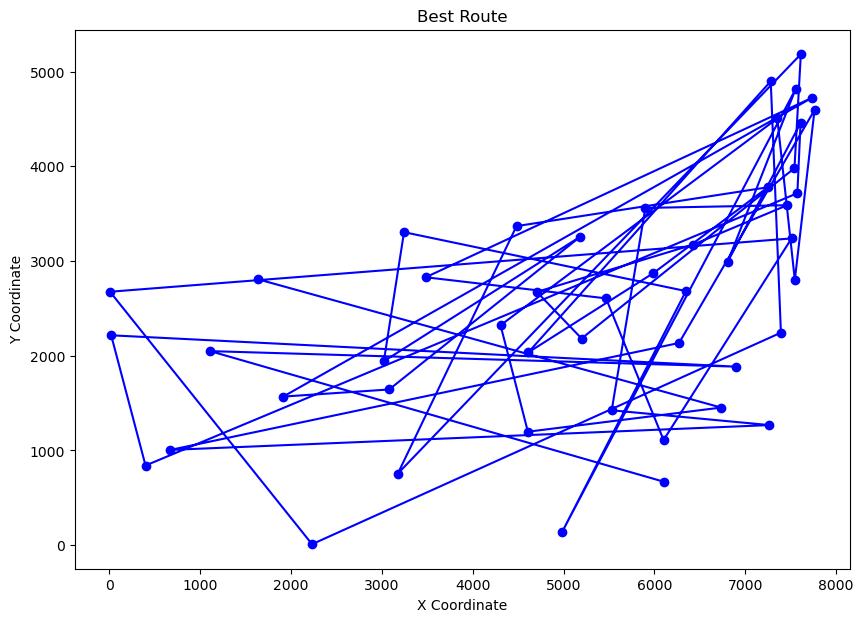

Running GA with mutation rate 0.02, population size 700, and 800 generations.
Generation 0: Best Fitness = 2.5015634771732333e-05
Generation 100: Best Fitness = 2.45176159070292e-05
Generation 200: Best Fitness = 2.6785235977928965e-05
Generation 300: Best Fitness = 2.614720878546215e-05
Generation 400: Best Fitness = 2.5441408436371037e-05
Generation 500: Best Fitness = 2.8496523424142255e-05
Generation 600: Best Fitness = 2.57062800442148e-05
Generation 700: Best Fitness = 2.5224498032489155e-05
Generation 799: Best Fitness = 2.563051055977035e-05
Final Best Route: [31, 36, 42, 46, 12, 23, 2, 38, 27, 3, 30, 5, 21, 40, 4, 25, 34, 37, 15, 22, 6, 0, 16, 41, 35, 43, 47, 13, 11, 7, 24, 9, 45, 19, 26, 14, 8, 1, 17, 33, 44, 10, 28, 29, 20, 18, 39, 32]
Final Best Distance: 39016.0


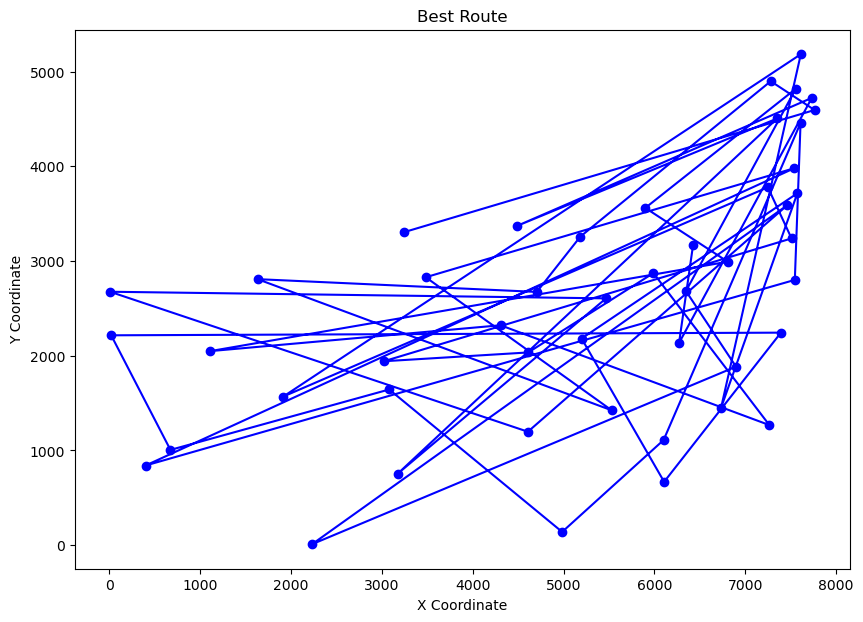

Running GA with mutation rate 0.01, population size 55, and 50 generations.
Generation 0: Best Fitness = 2.3644015699626426e-05
Generation 49: Best Fitness = 2.3412075948774378e-05
Final Best Route: [47, 30, 31, 7, 22, 14, 45, 1, 34, 29, 15, 23, 39, 33, 9, 24, 16, 17, 38, 18, 32, 3, 37, 2, 19, 6, 21, 4, 10, 11, 43, 12, 35, 27, 0, 8, 46, 42, 13, 28, 26, 5, 36, 20, 40, 41, 25, 44]
Final Best Distance: 42713.0


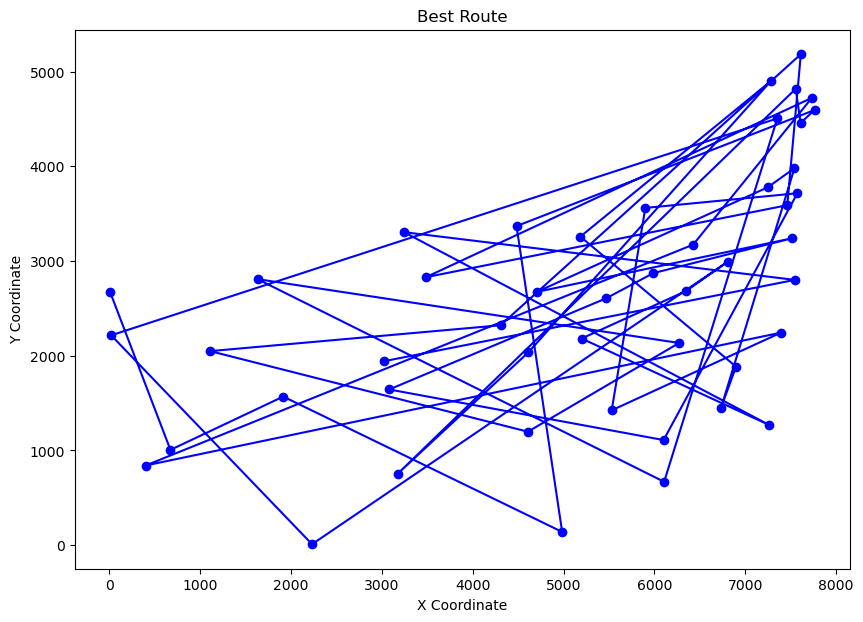

In [229]:
import numpy as np
import random
import tsplib95
import networkx as nx
import matplotlib.pyplot as plt

# Evaluation function to calculate the total distance of a route
def calculate_total_distance(route, distance_matrix):
    num_cities = len(distance_matrix)
    return sum(distance_matrix[route[i], route[(i + 1) % num_cities]] for i in range(num_cities)) + distance_matrix[route[-1], route[0]]

# Selection function using Roulette Wheel Selection
def roulette_wheel_selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    relative_fitness = [f / total_fitness for f in fitness_scores]
    cumulative_prob = np.cumsum(relative_fitness)
    selected_parents = []
    for _ in range(len(population)):
        r = random.random()
        for i, prob in enumerate(cumulative_prob):
            if r <= prob:
                selected_parents.append(population[i])
                break
    return selected_parents

# Crossover function using Ordered Crossover
def ordered_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child1 = [None] * size
    child1[start:end + 1] = parent1[start:end + 1]
    child2 = [None] * size
    child2[start:end + 1] = parent2[start:end + 1]
    return fill_none(child1, parent2, start, end), fill_none(child2, parent1, start, end)

def fill_none(child, parent, start, end):
    size = len(child)
    p_filled, p_parent = (end + 1) % size, (end + 1) % size
    while None in child:
        if parent[p_parent] not in child:
            child[p_filled] = parent[p_parent]
            p_filled = (p_filled + 1) % size
        p_parent = (p_parent + 1) % size
    return child

# Mutation function using Swap Mutation
def swap_mutation(route, mutation_rate):
    route = route.copy()
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

# Plot the best route
def plot_route(route, problem):
    plt.figure(figsize=(10, 7))
    coords = {node: problem.node_coords[node] for node in problem.get_nodes()}
    x_coords, y_coords = zip(*[coords[node + 1] for node in route])  # Adjusting for 1-based indexing
    plt.plot(x_coords, y_coords, 'o-', color='blue')
    plt.title('Best Route')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Genetic Algorithm solver for TSP
def solve_tsp(dataset_file, num_generations, population_size, mutation_rate):
    problem = tsplib95.load(dataset_file)
    distance_matrix = np.array(nx.to_numpy_matrix(problem.get_graph()))
    num_cities = len(distance_matrix)

    population = [np.random.permutation(num_cities) for _ in range(population_size)]
    for generation in range(num_generations):
        fitness_scores = [1 / calculate_total_distance(individual, distance_matrix) for individual in population]
        parents = roulette_wheel_selection(population, fitness_scores)
        offspring = []
        for i in range(0, len(parents), 2):
            child1, child2 = ordered_crossover(parents[i], parents[(i + 1) % len(parents)])
            offspring.extend([swap_mutation(child1, mutation_rate), swap_mutation(child2, mutation_rate)])
        population = offspring

        if generation % 100 == 0 or generation == num_generations - 1:
            best_fitness = max(fitness_scores)
            best_route = population[fitness_scores.index(best_fitness)]
            print(f"Generation {generation}: Best Fitness = {best_fitness}")

    best_fitness = max(fitness_scores)
    best_route = population[fitness_scores.index(best_fitness)]
    best_distance = 1 / best_fitness
    print(f"Final Best Route: {best_route}")
    print(f"Final Best Distance: {best_distance}")
    plot_route(best_route, problem)


parameters = [
    {"mutation_rate": 0.05, "population_size": 100, "num_generations": 100},
    {"mutation_rate": 0.02, "population_size": 700, "num_generations": 800},
    {"mutation_rate": 0.01, "population_size": 55, "num_generations": 50}
]

for param_set in parameters:
    print(f"Running GA with mutation rate {param_set['mutation_rate']}, population size {param_set['population_size']}, and {param_set['num_generations']} generations.")
    solve_tsp('att48.tsp', **param_set)


Generation 0: Best Fitness = 0.0004137360364087712, Route = [33, 7, 17, 12, 5, 8, 35, 6, 2, 26, 29, 22, 13, 3, 27, 38, 10, 34, 19, 37, 32, 15, 18, 0, 1, 4, 41, 11, 31, 28, 23, 16, 9, 24, 21, 39, 40, 36, 30, 14, 25, 20]
Best Route: [24, 17, 1, 10, 37, 36, 15, 26, 0, 35, 28, 18, 38, 23, 41, 13, 34, 9, 30, 7, 4, 21, 40, 6, 39, 25, 14, 20, 29, 32, 2, 19, 33, 31, 12, 8, 22, 11, 27, 5, 16, 3]
Best Distance: 2480.0


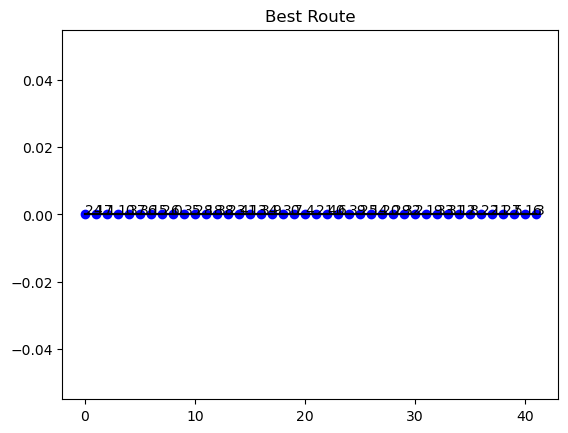

In [233]:
import numpy as np
import random
import tsplib95
import networkx
import matplotlib.pyplot as plt

problem = tsplib95.load ('gr17.tsp')

distance_matrix = np.array(networkx.to_numpy_matrix(problem.get_graph()))
num_cities = len(distance_matrix)
population_size = 55
num_generations = 50
mutation_rate = 0.01

# Evaluation function
def calculate_total_distance(route):
    return sum(distance_matrix[route[i], route[i + 1]] for i in range(num_cities - 1)) + distance_matrix[route[-1], route[0]]

# Selection function (Roulette Wheel Selection)
def roulette_wheel_selection(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    relative_fitness = [f / total_fitness for f in fitness_scores]
    cumulative_prob = [sum(relative_fitness[:i+1]) for i in range(len(relative_fitness))]
    selected_parents = []
    for _ in range(len(population)):
        r = random.random()
        for i, individual in enumerate(population):
            if r <= cumulative_prob[i]:
                selected_parents.append(individual)
                break
    return selected_parents

# Crossover function (Ordered Crossover)
def ordered_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child1 = [None]*size
    child1[start:end+1] = parent1[start:end+1]
    child2 = [None]*size
    child2[start:end+1] = parent2[start:end+1]
    child1 = fill_none(child1, parent2, start, end)
    child2 = fill_none(child2, parent1, start, end)
    return child1, child2

def fill_none(child, parent, start, end):
    size = len(child)
    filled_idx = (end + 1) % size
    parent_idx = (end + 1) % size
    while None in child:
        if parent[parent_idx] not in child:
            child[filled_idx] = parent[parent_idx]
            filled_idx = (filled_idx + 1) % size
        parent_idx = (parent_idx + 1) % size
    return child

# Mutation function (Swap Mutation)
def swap_mutation(route):
    mutated_route = route.copy()
    for i in range(len(mutated_route)):
        if random.random() < mutation_rate:
            swap_with = random.randint(0, len(mutated_route) - 1)
            mutated_route[i], mutated_route[swap_with] = mutated_route[swap_with], mutated_route[i]
    return mutated_route

def plot_route(route):
    # Plot each city as a numbered point
    for i, city in enumerate(route):
        plt.plot(i, 0, 'o', color='blue')
        plt.text(i, 0, str(city), color='black')
    
    # Draw lines for the route
    for i in range(len(route) - 1):
        x1, x2 = i, i + 1
        plt.plot([x1, x2], [0, 0], 'k-')
    
    # Connect the last city to the first to close the loop
    x1, x2 = len(route) - 1, 0
    plt.plot([x1, x2], [0, 0], 'k-')
    
    plt.title('Best Route')
    plt.show()

# Initialization
population = [np.random.permutation(num_cities) for _ in range(population_size)]

# Genetic Algorithm
for generation in range(num_generations):
    fitness_scores = [1 / calculate_total_distance(individual) for individual in population]
    parents = roulette_wheel_selection(population, fitness_scores)
    offspring = []
    for i in range(0, len(parents), 2):
        for child in ordered_crossover(parents[i], parents[(i + 1) % len(parents)]):
            offspring.append(swap_mutation(child))
    population = offspring

    if generation % 100 == 0:
        best_fitness = max(fitness_scores)
        best_route = population[fitness_scores.index(best_fitness)]
        print(f"Generation {generation}: Best Fitness = {best_fitness}, Route = {best_route}")

# Extract the best solution
best_fitness = max(fitness_scores)
best_route = population[fitness_scores.index(best_fitness)]
best_distance = 1 / best_fitness
print(f"Best Route: {best_route}")
print(f"Best Distance: {best_distance}")
# Calling the plot_route function without the 'problem' argument
plot_route(best_route)




Running GA with mutation rate 0.01, population size 400, and 600 generations.
Generation 0: Best Fitness = 2.5152803279925547e-05
Generation 100: Best Fitness = 2.6132176548984765e-05
Generation 200: Best Fitness = 2.9185150595377073e-05
Generation 300: Best Fitness = 2.6089905815440007e-05
Generation 400: Best Fitness = 2.511048613901165e-05
Generation 500: Best Fitness = 2.7489141788993348e-05
Final Best Route: [12, 27, 46, 26, 29, 16, 36, 40, 28, 11, 42, 9, 18, 17, 5, 38, 14, 39, 30, 45, 43, 0, 21, 41, 31, 6, 32, 23, 44, 34, 13, 24, 4, 20, 47, 19, 35, 8, 33, 3, 1, 22, 15, 10, 7, 37, 25, 2]
Final Best Distance: 37507.0


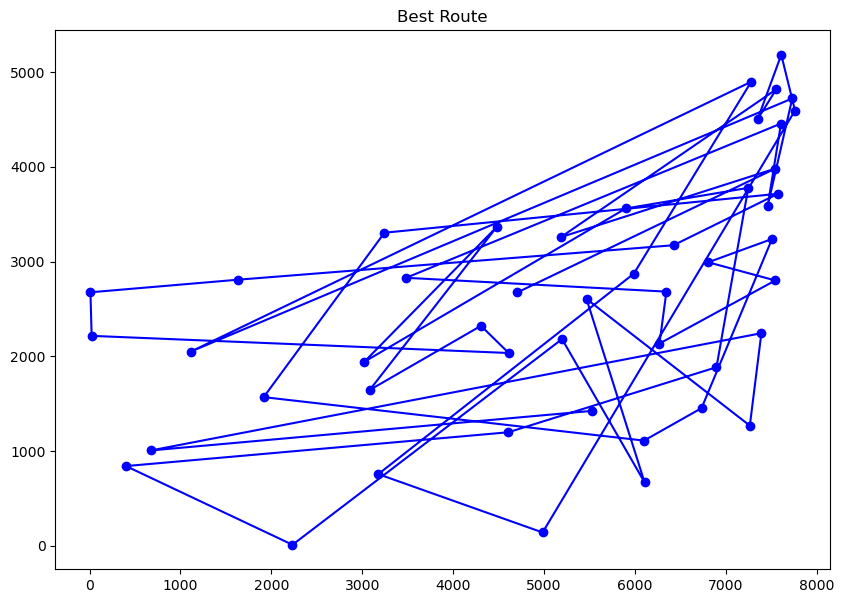

Running GA with mutation rate 0.1, population size 55, and 50 generations.
Generation 0: Best Fitness = 2.2623410705397947e-05
Final Best Route: [39, 4, 24, 35, 5, 36, 6, 32, 34, 8, 15, 3, 29, 10, 38, 20, 1, 40, 13, 26, 19, 7, 16, 9, 28, 44, 23, 21, 0, 25, 42, 27, 43, 18, 12, 47, 14, 30, 11, 45, 17, 46, 31, 41, 33, 22, 37, 2]
Final Best Distance: 35479.0


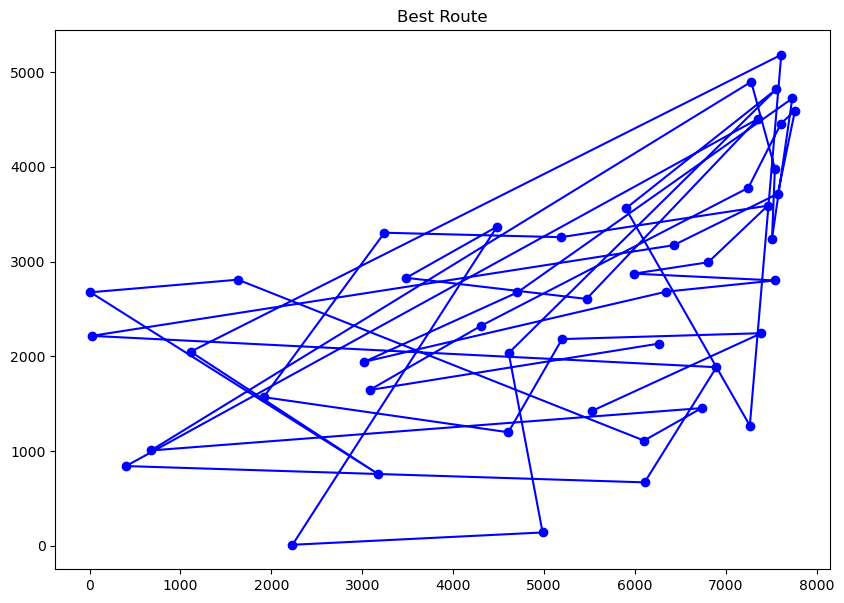

In [245]:
import numpy as np
import random
import tsplib95
import networkx as nx
import matplotlib.pyplot as plt

# Load the TSP problem
problem = tsplib95.load('att48.tsp')

# Extract the distance matrix from the problem
distance_matrix = np.array(nx.to_numpy_matrix(problem.get_graph()))
num_cities = len(distance_matrix)

# Define the GA components
def calculate_total_distance(route):
    """Evaluation function to calculate total distance of a route."""
    return sum(distance_matrix[route[i], route[(i + 1) % num_cities]] for i in range(num_cities)) + distance_matrix[route[-1], route[0]]

def tournament_selection(population, fitness_scores, tournament_size=3):
    """Selection function using tournament selection."""
    selected_parents = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitness_scores)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])
        selected_parents.append(winner[0])
    return selected_parents

def partially_mapped_crossover(parent1, parent2):
    """Crossover function using partially mapped crossover (PMX)."""
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child1, child2 = parent1[:], parent2[:]
    for i in range(start, end + 1):
        value1, value2 = child1[i], child2[i]
        index1, index2 = child1.index(value2), child2.index(value1)
        child1[i], child1[index1] = value2, value1
        child2[i], child2[index2] = value1, value2
    return child1, child2

def inversion_mutation(route):
    """Mutation function using inversion mutation."""
    route_copy = route[:]
    start, end = sorted(random.sample(range(len(route)), 2))
    route_copy[start:end+1] = reversed(route_copy[start:end+1])
    return route_copy

def plot_route(route, problem):
    """Plot the best route."""
    plt.figure(figsize=(10, 7))
    coords = {node: problem.node_coords[node] for node in problem.get_nodes()}
    x_coords, y_coords = zip(*[coords[node + 1] for node in route])  # Adjusting for 1-based indexing
    plt.plot(x_coords, y_coords, 'o-', color='blue')
    plt.title('Best Route')
    plt.show()

def solve_tsp(num_generations, population_size, mutation_rate):
    """Solve the TSP using a genetic algorithm."""
    population = [list(np.random.permutation(num_cities)) for _ in range(population_size)]
    for generation in range(num_generations):
        fitness_scores = [1 / calculate_total_distance(individual) for individual in population]
        parents = tournament_selection(population, fitness_scores)
        offspring = []
        for i in range(0, len(parents), 2):
            child1, child2 = partially_mapped_crossover(parents[i], parents[min(i + 1, len(parents) - 1)])
            offspring.extend([inversion_mutation(child1), inversion_mutation(child2)])
        population = offspring

        if generation % 100 == 0:
            best_fitness = max(fitness_scores)
            best_route = population[fitness_scores.index(best_fitness)]
            print(f"Generation {generation}: Best Fitness = {best_fitness}")

    best_fitness = max(fitness_scores)
    best_route = population[fitness_scores.index(best_fitness)]
    best_distance = 1 / best_fitness
    print(f"Final Best Route: {best_route}")
    print(f"Final Best Distance: {best_distance}")
    plot_route(best_route, problem)

# Run the genetic algorithm with different sets of parameters
parameter_sets = [
    {"num_generations": 600, "population_size": 400, "mutation_rate": 0.01},
    {"num_generations": 50, "population_size": 55, "mutation_rate": 0.1}
]

for params in parameter_sets:
    print(f"Running GA with mutation rate {params['mutation_rate']}, population size {params['population_size']}, and {params['num_generations']} generations.")
    solve_tsp(**params)
